<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

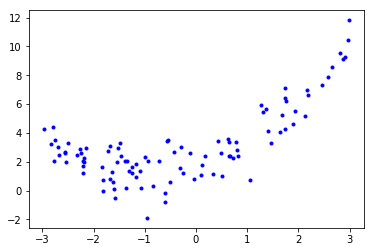

In [2]:
import numpy as np
import matplotlib.pyplot as plt 



m = 100 
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2 + x + 2 + np.random.randn(m,1)


plt.plot(x,y,"b.")
plt.show()


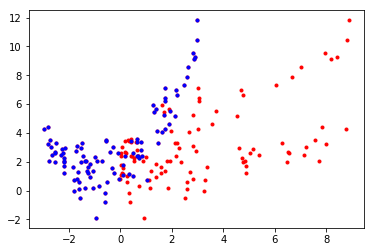

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)

#plt.plot(x,y,"b.")
plt.plot(x_poly,y,"r.")
plt.plot(x,y,"b.")
plt.show()



In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.71850656]), array([[1.07149837, 0.58048915]]))

In [0]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
  train_errors,val_errors = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict,y_val))
    
    
  plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")





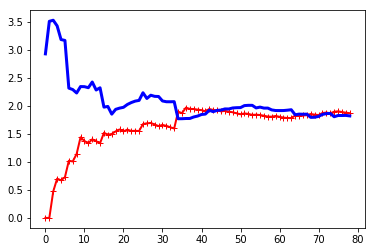

In [18]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,x,y)

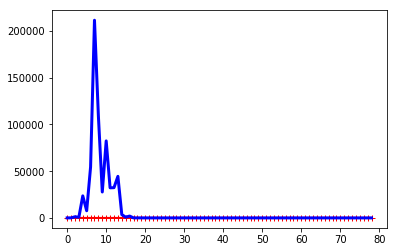

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

plot_learning_curves(polynomial_regression,x,y)